In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

# Importing the data

In [ ]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
train.head()

In [ ]:
test = pd.read_csv('../input/spaceship-titanic/test.csv') 
test.head()

In [ ]:
train.info()

In [ ]:
test.info()

# Null values Treatment

In [ ]:
train.isna().sum()/len(train)

In [ ]:
test.isna().sum()/len(test)

In [ ]:
for i in test.columns:
    train[i] = train[i].fillna(train[i].mode()[0])
    test[i] = test[i].fillna(test[i].mode()[0])

In [ ]:
train.isna().sum()/len(train)

In [ ]:
test.isna().sum()/len(test)

In [ ]:
! pip install sweetviz

# EDA

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.compare(train,test,'Age')
report.show_notebook()

You can expand and analyze the visualization if it's not convenient find my sweetviz visual in output as html download and open it will go to a new chrome table so you can analyze fully (will be more comfortable).

In [ ]:
report.show_html('age_comparison')

In [ ]:
train['Transported'] = train['Transported'].astype('O')

In [ ]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in train.columns:
    if train[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in cat:
    train[i] = le.fit_transform(train[i])
train.head()

In [ ]:
for i in cat:
    if i!='Transported':
        test[i] = le.fit_transform(test[i])
test.head()

In [ ]:
xtrain = train.drop('Transported',1)
ytrain = train.Transported
xtest = test

In [ ]:
! pip install git+https://github.com/keras-team/keras-tuner.git
! pip install autokeras

# ML algorithm

In [ ]:
import autokeras as ak
from xgboost import XGBClassifier

# Keras (Model 1)


AutoKeras is an implementation of AutoML for deep learning models using the Keras API, specifically the tf. keras API provided by TensorFlow 2. It uses a process of searching through neural network architectures to best address a modeling task, referred to more generally as Neural Architecture Search, or NAS for short.

<img src='https://drek4537l1klr.cloudfront.net/song/v-3/Figures/CH04_FIG_1_kerasecosystem.png'>

In [ ]:
reg = ak.StructuredDataClassifier(max_trials=5, overwrite=True)

In [ ]:
reg.fit(xtrain, ytrain, epochs=10)

In [ ]:
print(reg.evaluate(xtrain, ytrain))

In [ ]:
yred_keras = reg.predict(xtest)
yred_keras[:6]

# XGB (Model 2)

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

<img src='https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/xgboost/img-3.png'>

In [ ]:
model=XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=-1,cv=ak)

I have build pipeline using xgb and keras inside which will increase the performance.

In [ ]:
model.fit(xtrain,ytrain)

In [ ]:
model.score(xtrain,ytrain)

In [ ]:
ypred_final = model.predict(xtest)
ypred_final

# Submission

In [ ]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

In [ ]:
sub['Transported'] = ypred_final

In [ ]:
sub['Transported'] = sub['Transported'].replace({1:True,0:False})
sub.set_index('PassengerId',inplace=True)
sub.head()

In [ ]:
sub.to_csv('submission.csv')

# Thank you!

Thank you for coming this far hope you enjoyed my work. Do follow me on social meadia, for more coding and explanation of concept in Data Science and Big Data:

* linkedin : https://www.linkedin.com/in/anandaram-g/
* Kaggle : https://www.kaggle.com/anandaramg
* Github : https://github.com/anand-lab-172
* Medium : https://medium.com/@anandlab

Don't forget to comment if you enjoyed or you find any mistake in my work 😊

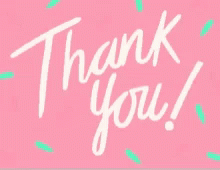